## 1- Importing Libaries

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.ones([2], dtype = 'uint8')
b = a * 100

print(b)
print(b + 155)
print(b+160)

[100 100]
[255 255]
[4 4]


In [3]:
m1 = np.array([[150, 155], [156, 157]], dtype = "uint8") 
m2 = np.ones([2,2], dtype = "uint8") * 100

print("m1:")
print(m1)

print("m2:")
print(m2)

print("m1+m2:")
print(m1 + m2)

m1:
[[150 155]
 [156 157]]
m2:
[[100 100]
 [100 100]]
m1+m2:
[[250 255]
 [  0   1]]


## 2- Solving the Problem

- method 1

In [4]:
m1 = np.array([[150, 155], [156, 157]], dtype = "uint8") 
m2 = np.ones([2,2], dtype = "uint8") * 100 #or you can simply write 100

modified_m1 = m1.astype('int16') + m2
modified_m1 = np.minimum(modified_m1, 255)
modified_m1 = modified_m1.astype('uint8')
modified_m1

array([[250, 255],
       [255, 255]], dtype=uint8)

- method 2

In [5]:
m1 = np.array([[150, 155], [156, 157]], dtype = "uint8") 

value_to_add = 100
max_threshold = 255 - 100

m1[m1 >= max_threshold] = 255
m1[m1 < max_threshold] += value_to_add

print(m1)

[[250 255]
 [255 255]]


## 3- OpenCV Operation

Text(0.5, 1.0, 'Subtracted')

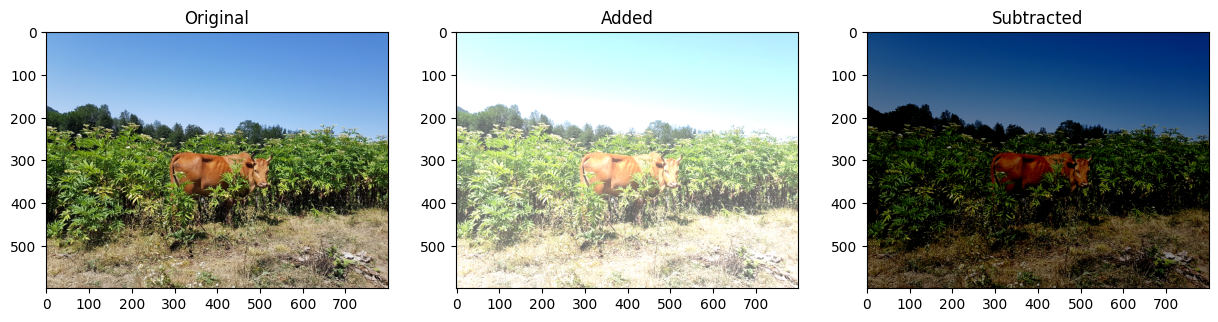

In [9]:
image = cv.imread('images/input.jpg')

# Create a matrix of ones, then multiply it by a scaler of 100 
# This gives a matrix with same dimesions of our image with all values being 100
M = np.ones(image.shape, dtype = "uint8") * 100

added = cv.add(image, M)
subtracted = cv.subtract(image, M)


plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(image[...,::-1])
plt.title("Original")

plt.subplot(132)
plt.imshow(added[...,::-1])
plt.title("Added")

plt.subplot(133)
plt.imshow(subtracted[...,::-1])
plt.title("Subtracted")


# cv.imshow("Original", image)
# cv.imshow("Added", added)
# cv.imshow("Subtracted", subtracted)

# cv.waitKey(0)
# cv.destroyAllWindows()

## 4- Merging Colored Images

Text(0.5, 1.0, 'image1+image2')

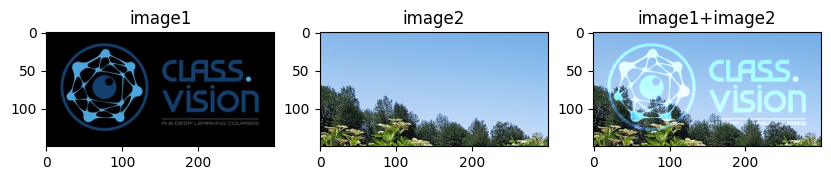

In [10]:
img1 = cv.imread('./images/class.vision.jpg')
shape = img1.shape
img2 = cv.imread('./images/input.jpg')[100:100+shape[0], 100:100+shape[1],:]

output_image = cv.add(img1,img2)

plt.figure(figsize=[10,5])

plt.subplot(131)
plt.imshow(img1[...,::-1])
plt.title("image1")

plt.subplot(132)
plt.imshow(img2[...,::-1])
plt.title("image2")

plt.subplot(133)
plt.imshow(output_image[...,::-1])
plt.title("image1+image2")


In [12]:
img1 = cv.imread('./images/input.jpg')
img2 = cv.imread('./images/class.vision.jpg')

print(img1.shape)
print(img2.shape)

(600, 800, 3)
(150, 300, 3)


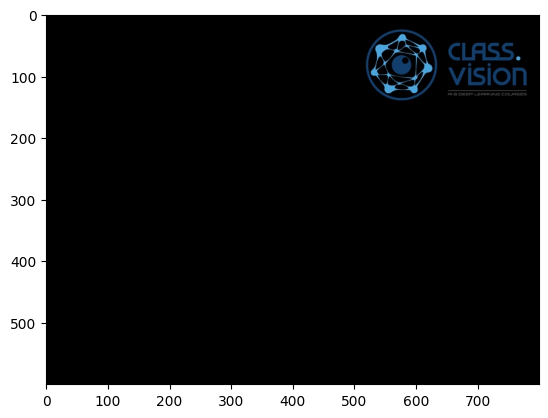

In [13]:
logo_h, logo_w, _ = img2.shape

location_h = 10
location_w = 500

padded_img2 = np.zeros_like(img1)
padded_img2[location_h:location_h+logo_h,location_w:location_w+logo_w,:] = img2

plt.imshow(padded_img2[...,::-1])

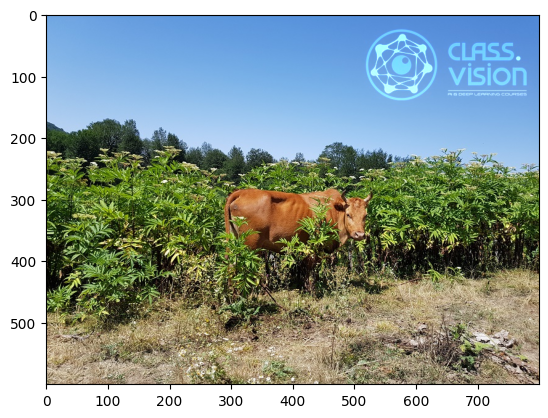

In [15]:
output_image = cv.add(img1,padded_img2)

plt.imshow(output_image[...,::-1])